# 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

### а) зависимость цены на недвижимость в конкретном регионе от времени,

### б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

### д) координаты автобуса при движении по маршруту,

### е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

In [1]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
print(os.listdir())

['.ipynb_checkpoints', 'covid_19_data.csv', 'les_1.ipynb', 'нефть-brent 2010-2019.csv', 'нефть-brent 2010-2019.xlsx']


## 2. вариант 2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке). Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('covid_19_data.csv', index_col=[0], parse_dates=[0])

In [3]:
data_RUS = data.loc[data['Country/Region'] == 'Russia']

In [4]:
data_RUS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 483 to 23294
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  101 non-null    object 
 1   Province/State   0 non-null      object 
 2   Country/Region   101 non-null    object 
 3   Last Update      101 non-null    object 
 4   Confirmed        101 non-null    float64
 5   Deaths           101 non-null    float64
 6   Recovered        101 non-null    float64
dtypes: float64(3), object(4)
memory usage: 4.7+ KB


In [5]:
data_RUS.drop(['Province/State'], axis='columns', inplace=True)

c:\users\vozne\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
data_RUS.index = data_RUS['ObservationDate']

In [7]:
data_RUS.head()

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
01/31/2020,01/31/2020,Russia,1/31/2020 23:59,2.0,0.0,0.0
02/01/2020,02/01/2020,Russia,1/31/2020 16:13,2.0,0.0,0.0
02/02/2020,02/02/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
02/03/2020,02/03/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
02/04/2020,02/04/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0


## количество записей по России больше 50 . всего 101 день

In [8]:
# проверим пропуски
data_RUS['Confirmed'].isnull().sum()

0

In [9]:
data_RUS['Deaths'].isnull().sum()

0

In [10]:
data_RUS['Recovered'].isnull().sum()

0

пропусков нет

Text(0, 0.5, 'человек')

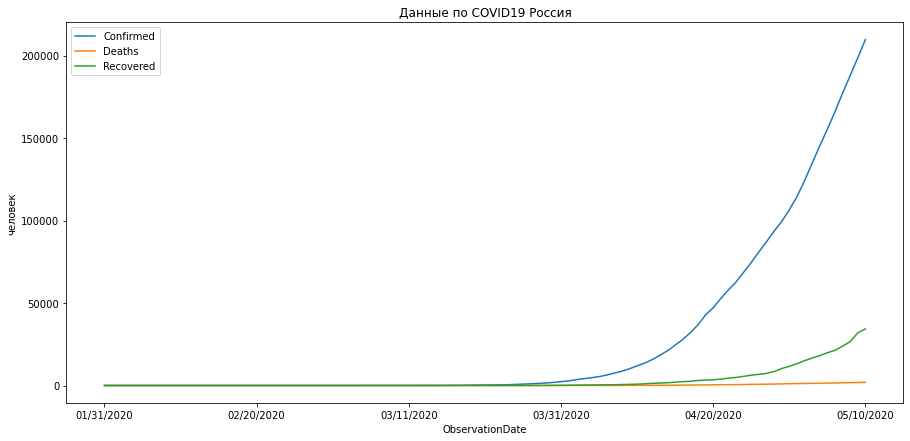

In [11]:
data_RUS.plot(style = '-', figsize = ( 15, 7 ), title = 'Данные по COVID19 Россия' )
plt.ylabel ( 'человек' )

### Данные без аномалий на которые стоит обратить внимание,при этом резкий рост заражения начался после 31 марта 2020.  Хотя есть один вопрос... С учетом протекания болезни скажем 20 дней(с момента деагностирования... да и то это очень много), то количество зараженных 20 дней назад (на 20/04/20 это 47 121 человек)по идее должно совпадать с сумарным количеством на сегодня выздоровившихся( на10/05/20 это 34 306 чел)  и умерших(на10/05/20 это 1 915 чел) , но судя по графику это не так.... и куда же делась эта разница? Особенно странно это выглядит на фоне того , что было заявлено что 40 процентов переносят болезнь безсимптомно, значит болеют меньше 20 дней)

#### данные на 20/04/20

In [12]:
data_RUS.loc[data_RUS['ObservationDate'] =='04/20/2020']

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
04/20/2020,04/20/2020,Russia,2020-04-20 23:44:50,47121.0,405.0,3446.0


### Посчитаем количество умерших и выздоровившихся на 10/05/20

In [13]:
data_RUS100520 = data_RUS.loc[data_RUS['ObservationDate'] =='05/10/2020']

In [14]:
data_RUS100520

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
05/10/2020,05/10/2020,Russia,2020-05-11 02:32:30,209688.0,1915.0,34306.0


In [15]:
Deaths_Recovered = data_RUS100520['Deaths'] + data_RUS100520['Recovered']

In [16]:
Deaths_Recovered

ObservationDate
05/10/2020    36221.0
dtype: float64

### Найдем на какое число было число заразившихся 36 221 человек

In [17]:
data_RUS_36221 = data_RUS.loc[data_RUS['Confirmed'] >= 36221.0]

In [18]:
data_RUS_36221.head(1)

,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
04/18/2020,04/18/2020,Russia,2020-04-18 22:40:18,36793.0,313.0,3057.0


### Это 18/04/20 года. Значит средний срок болезни(с момента когда поставили диагноз до выздоровления или смерти) на текущий момент это разница между 10/05/20 и 18/04/20 - 22 дня

## 3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [53]:
br_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
br_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [63]:
br_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [64]:
br_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


# по месяцам

In [45]:
br_data_M = br_data.loc[br_data.index.isin(pd.date_range('2010-09-01', '2019-09-01', freq="M"))]
br_data_M.head()

,Значение
Дата,
2019-07-31,65.05
2019-06-30,65.63
2019-05-31,61.76
2019-04-30,71.66
2019-03-31,67.84


In [50]:
br_data_M.describe()

,Значение
count,87.000000
mean,81.566667
std,26.192010
min,35.820000
25%,55.970000
50%,77.710000
75%,108.300000
max,123.040000


# по неделям

In [46]:
br_data_W = br_data.loc[br_data.index.isin(pd.date_range('2010-09-01', '2019-09-01', freq="W"))]
br_data_W.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-25,57.81
2019-08-18,58.89
2019-08-11,58.27
2019-08-04,61.33


In [51]:
br_data_W.describe()

,Значение
count,358.000000
mean,87.363296
std,23.753657
min,45.980000
25%,63.610000
50%,93.000000
75%,108.997500
max,126.280000


# по годам

In [47]:
br_data_Y = br_data.loc[br_data.index.isin(pd.date_range('2010-09-01', '2019-09-01', freq="Y"))]
br_data_Y.head()

,Значение
Дата,
2018-12-31,54.15
2015-12-31,36.56
2014-12-31,57.54
2013-12-31,110.90
2012-12-31,111.11


In [52]:
br_data_Y.describe()

,Значение
count,6.000000
mean,77.475000
std,32.115305
min,36.560000
25%,54.997500
50%,76.065000
75%,106.822500
max,111.110000


Text(0, 0.5, 'USD')

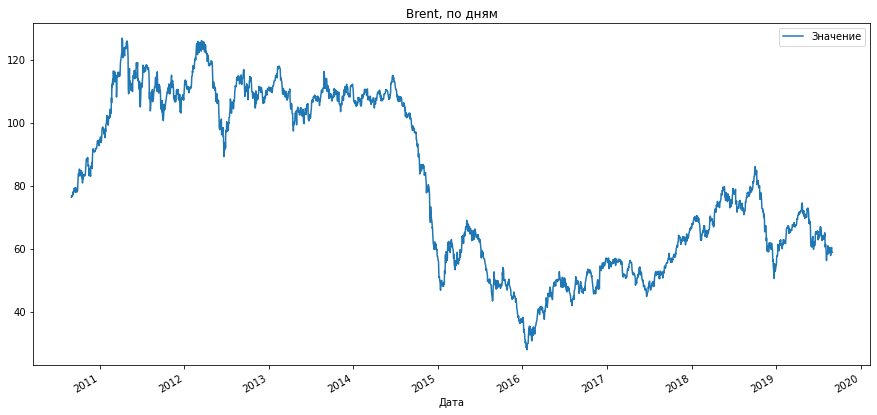

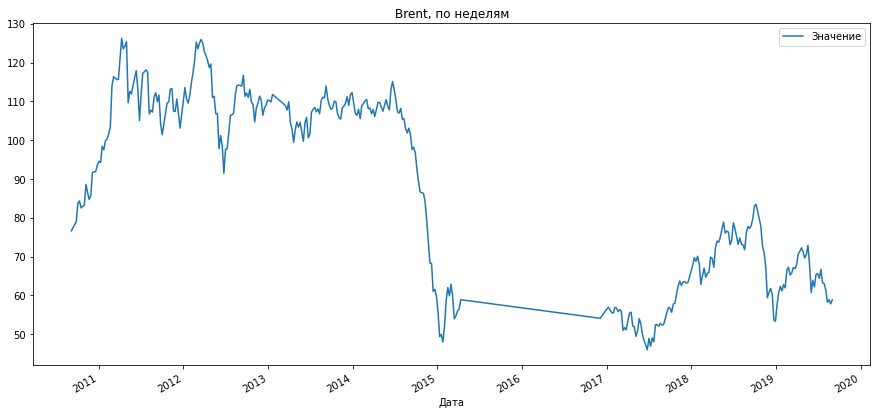

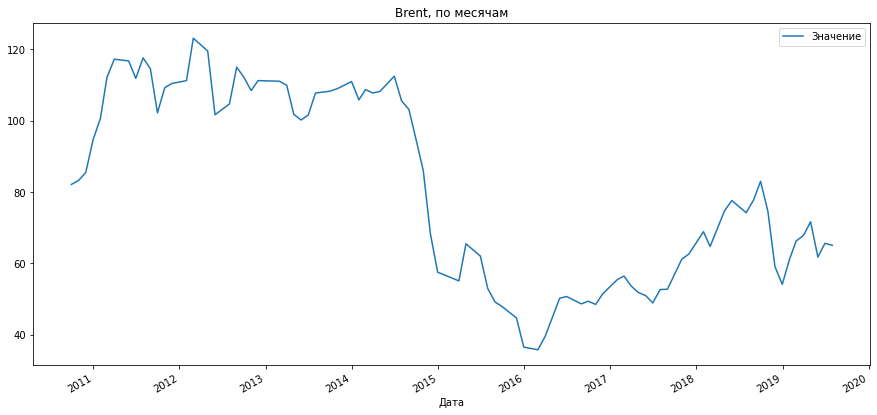

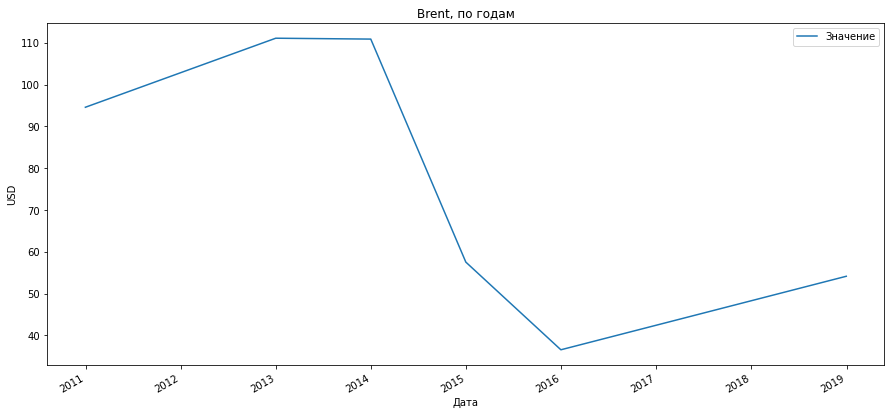

In [48]:
br_data.plot( style = '-', figsize = ( 15, 7 ), title = 'Brent, по дням' )
br_data_W.plot( style = '-', figsize = ( 15, 7 ), title = 'Brent, по неделям' )
br_data_M.plot( style = '-', figsize = ( 15, 7 ), title = 'Brent, по месячам' )
br_data_Y.plot( style = '-', figsize = ( 15, 7 ), title = 'Brent, по годам' )
plt.ylabel ( 'USD' )

### при анализе недельного графика виден аномальный период с 2015 по 2017 года. при более детальном анализе  оказалось, что данные на начало недели в предоставленном файле в этот период пропущены.

# 4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовыми и исходными дневными.

### чем больше период, тем более сглаженные получаются графики.